## Problema de negócio

A empresa para qual você trabalha, lhe pediu umas informações sobre suicídio no Brasil, desejando conhecer as pessoas mais propícias a tirarem a própria vida. O objetivo é a construção de uma campanha de marketing anti-suicídio através de palestras. Com os resultados da sua análise, buscarão locais onde se concentrem as características que você descobriu explorando os dados.

## Obtenção e limpeza dos dados

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
cor_genero = ['#F781D8', '#819FF7']

In [36]:
df = pd.read_csv('https://raw.githubusercontent.com/carlosfab/data_science/master/datasets/suicide_rates.csv')
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


**Dicionário dos dados**

Country: Coluna que representa os países (string)

Year: Coluna que representa os anos (integer)

Sex: Coluna que representa os gêneros (string)

Age: Coluna que representa as idades (string)

Suicides_no: Coluna que representa o número de suicídios (integer)

Population: Coluna que representa a população (integer)

Suicides/100k pop: Coluna que representa o número de suicídio a cada 100 mil habitantes (float)

Country-year: Coluna que representa (string)

HDI for year: Coluna que representa o IDH em cada ano (float)

Gdp_for_year ($): Coluna que representa o PIB em cada ano (string)

Gdp_per_capita ($): Coluna que representa o PIB per capita (float)

Generation: Coluna que representa a geração (string)

Como estamos tratando do caso Brasileiro, iremos limitar nosso dataframe, selecionando apenas o "Brazil" na coluna "Country"

In [37]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [38]:

df_brasil = df[df['country']=='Brazil']
df_brasil.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
4172,Brazil,1985,male,75+ years,129,840300,15.35,Brazil1985,0.576,"222,942,790,435",1898,G.I. Generation
4173,Brazil,1985,male,55-74 years,535,5364900,9.97,Brazil1985,0.576,"222,942,790,435",1898,G.I. Generation
4174,Brazil,1985,male,35-54 years,1011,11986300,8.43,Brazil1985,0.576,"222,942,790,435",1898,Silent
4175,Brazil,1985,male,25-34 years,791,10762900,7.35,Brazil1985,0.576,"222,942,790,435",1898,Boomers
4176,Brazil,1985,male,15-24 years,661,13834000,4.78,Brazil1985,0.576,"222,942,790,435",1898,Generation X


Como desejamos conhecer as características pessoais, vamos selecionar as seguintes colunas "sex", "age", "generation" e "year".

In [39]:
df_brasil = df_brasil[['sex','age','year','generation', 'suicides_no']]

In [40]:
df_brasil['age'] = df_brasil['age'].apply(lambda x: x.replace('+ years','') if '+' in x else x.replace(' years',''))

In [41]:
df_brasil

,sex,age,year,generation,suicides_no
4172,male,75,1985,G.I. Generation,129
4173,male,55-74,1985,G.I. Generation,535
4174,male,35-54,1985,Silent,1011
4175,male,25-34,1985,Boomers,791
4176,male,15-24,1985,Generation X,661
...,...,...,...,...,...
4539,female,25-34,2015,Millenials,466
4540,female,75,2015,Silent,89
4541,female,15-24,2015,Millenials,397
4542,male,5-14,2015,Generation Z,79


## Análise exploratória

### Por gênero

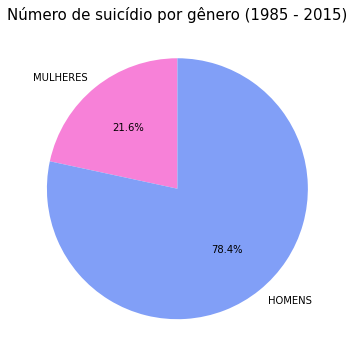

In [60]:
generos = df_brasil.groupby('sex').suicides_no.sum() / df_brasil.groupby('sex').suicides_no.sum().sum()

fig = plt.figure(figsize=(6,6))
plt.pie(generos, labels=['MULHERES', 'HOMENS'], colors = cor_genero, autopct='%1.1f%%', startangle=90)
plt.title('Número de suicídio por gênero (1985 - 2015)', fontsize=15);

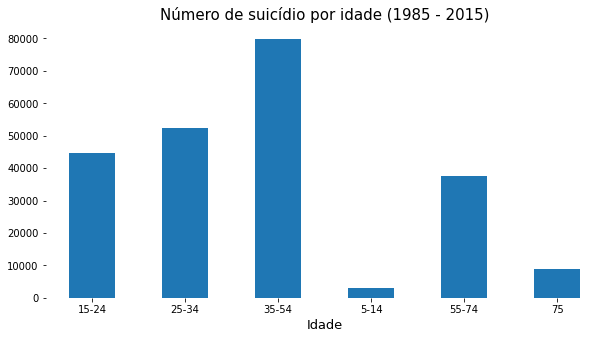

In [74]:
df_brasil.groupby('age').suicides_no.sum().plot(kind='bar', figsize=(10,5))
plt.box(False)
plt.xticks(rotation=360)
plt.xlabel('Idade',fontsize=13)
plt.title('Número de suicídio por idade (1985 - 2015)', fontsize=15);

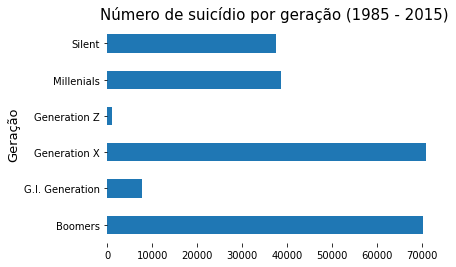

In [78]:
df_brasil.groupby('generation').suicides_no.sum().plot(kind='barh')
plt.box(False)
plt.ylabel('Geração',fontsize=13)
plt.title('Número de suicídio por geração (1985 - 2015)', fontsize=15);

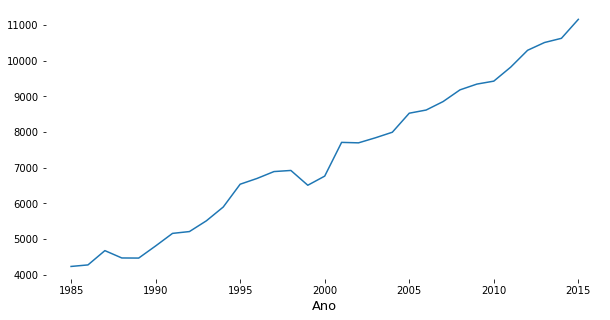

In [79]:
df_brasil.groupby('year').suicides_no.sum().plot(figsize=(10,5))
plt.box(False)
plt.xlabel('Ano',fontsize=13);

## Direcionamento da campanha

Observa-se que os índices de suicídios são mais altos em pessoas do **sexo masculino, com idade entre 35-54 anos, sendo da geração "boomers" ou "geração x"**, e essa tendência acompanha a tendência positiva de crescimento da taxa de suicídio absoluto desde 1985

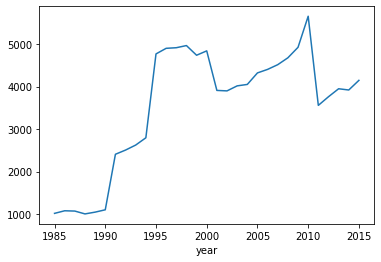

In [55]:
df_brasil[(df_brasil['age'] == '35-54') & (df_brasil['sex'] == 'male') & (df_brasil['generation'] == 'Boomers') |(df_brasil['generation'] == 'Generation X')].groupby('year').suicides_no.sum().plot()

Uma campanha de marketing eficiente e efetivo na luta contra o suicídio, deve ser ampla, mas buscando estar presente em locais onde haja uma maior concentração de pessoas propícias ao suicídio. Os dados e resultados aqui apresentados podem ser muito úteis para essa tarefa.